In [2]:
!pip install catboost

  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl.metadata (1.5 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
  Using cached narwhals-1.38.0-py3-none-any.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 2.4 MB/s eta 0:00:43
    --------------------------------------- 1.6/102.5 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.6/102.5 MB 3.5 MB/s eta 0:00:29
   - -------------------------------------- 2.6/102.5 MB 3.2 MB/s eta 0:00:32
   - -------------------------------------- 3.9/102.5 MB 3.7 MB/s eta 0:00:27
   - -------------------------------------- 5.0/102.5 MB 3.8 MB/s eta 0:00:26
   -- ------------------------------------- 5.8/102.5 MB 3.9 MB/s eta 0:00:25
   -- ------------------------------------- 

0:	learn: 0.6895349	total: 139ms	remaining: 13.8s
1:	learn: 0.6854098	total: 148ms	remaining: 7.24s
2:	learn: 0.6818690	total: 150ms	remaining: 4.83s
3:	learn: 0.6776512	total: 161ms	remaining: 3.85s
4:	learn: 0.6741838	total: 163ms	remaining: 3.09s
5:	learn: 0.6705784	total: 165ms	remaining: 2.58s
6:	learn: 0.6673377	total: 167ms	remaining: 2.22s
7:	learn: 0.6635054	total: 169ms	remaining: 1.94s
8:	learn: 0.6597769	total: 170ms	remaining: 1.72s
9:	learn: 0.6563401	total: 173ms	remaining: 1.55s
10:	learn: 0.6532281	total: 174ms	remaining: 1.41s
11:	learn: 0.6510856	total: 175ms	remaining: 1.29s
12:	learn: 0.6476627	total: 177ms	remaining: 1.19s
13:	learn: 0.6439747	total: 179ms	remaining: 1.1s
14:	learn: 0.6409258	total: 182ms	remaining: 1.03s
15:	learn: 0.6381027	total: 184ms	remaining: 964ms
16:	learn: 0.6359227	total: 186ms	remaining: 906ms
17:	learn: 0.6330082	total: 188ms	remaining: 855ms
18:	learn: 0.6297641	total: 190ms	remaining: 810ms
19:	learn: 0.6268956	total: 192ms	remainin

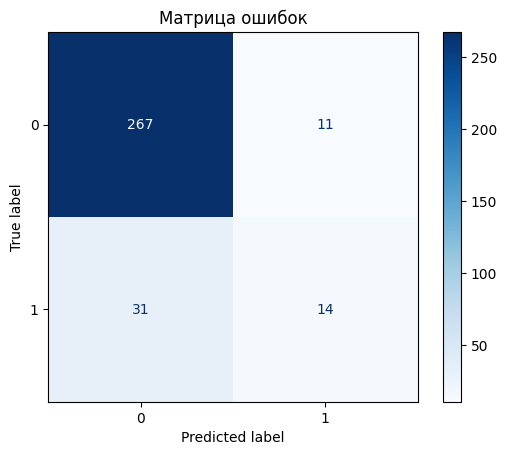

Лучшая модель сохранена в best_catboost_model.pkl


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier  # <-- импортируем CatBoost
import joblib

# Функция для загрузки данных
def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

# Загрузка данных
df = read_dataset("../../data/datasets/1st_course_bak_spec.csv")

# Предположим, у тебя есть DataFrame df и целевая переменная — 'Таргет'
X = df.drop(columns=['Таргет'])  # замените на имя вашей целевой колонки
y = df['Таргет']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Пайплайн с CatBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # можно убрать, если много категориальных признаков
    ('clf', CatBoostClassifier(verbose=1))  # verbose=0 отключает логирование во время обучения
])

# Параметры для GridSearch
param_grid = {
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__depth': [3, 6, 10],                # глубина деревьев
    'clf__n_estimators': [50, 100, 200],     # количество деревьев
    'clf__l2_leaf_reg': [1, 3, 5],           # регуляризация
    'clf__border_count': [32, 64, 128],      # аналог max_bins в других бустингах
    'clf__class_weights': [[1, 1], [1, 2], [1, 3]]  # веса классов
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Предсказания
y_pred = grid_search.predict(X_test)

# Результаты
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая модель:", grid_search.best_estimator_)

print("\nОтчёт классификации:\n", classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.best_estimator_.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.show()

# Сохранение лучшей модели
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'catboost_model_bak_spec.pkl')
print("Лучшая модель сохранена в best_catboost_model.pkl")